# SeeFood

## Import necessary packages

First things first, lets now import all things that we will need to completely finish this project:
- __numpy__ for working with vectors and matrices
- __tensorflow__ for data preprocessing, building the model and training the data
- __matplotlib__ for data visualization

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import datasets, layers, models
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

## Loading the data

The dataset itself is available on the kaggle website: https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog

It contains 1000 food pictures, 500 of which are hot-dogs and other 500 of other foods extracted from the Food 101 dataset, and it has a following structure:

In [140]:
# Specify paths to the data
train_path = '..\\data\\train'
test_path = '..\\data\\test'

batch_size = 128
image_size = 32 

### Understand the data

After we've specified the path to our data, we can use tensorflow's class __ImageDataGenerator__

In [141]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [142]:
#Generator for our training data
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_path,
                                                     color_mode='rgb',
                                                     shuffle=True,
                                                     target_size=(image_size, image_size),
                                                     class_mode='binary')

Found 498 images belonging to 2 classes.


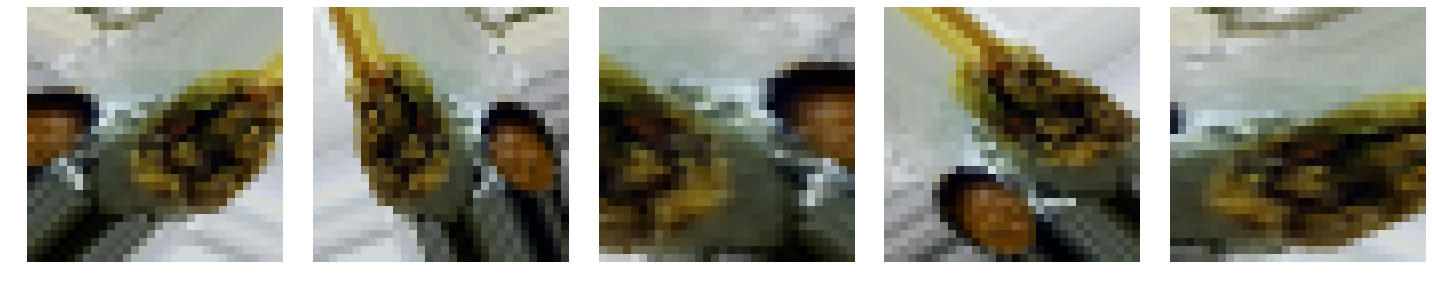

In [143]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [144]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              color_mode='rgb',
                                                              directory=test_path,
                                                              target_size=(image_size, image_size),
                                                              class_mode='binary')

Found 500 images belonging to 2 classes.


### Verify the data


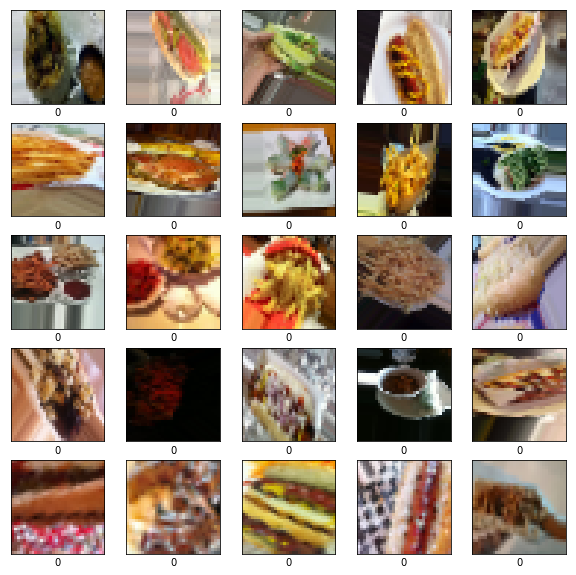

In [145]:
plt.figure(figsize=(10,10))
named_labels = ["not hot dog", "hot dog"]

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data_gen[0][0][i])
    plt.xlabel(train_data_gen.labels[i])
plt.show()

#print(train_data_gen.labels)

In [146]:



# model = Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', 
#            input_shape=(image_size, image_size ,3)),
#     MaxPooling2D(),
#     Dropout(0.2),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Dropout(0.2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

### Add Dense layer

Let's see the model architecture:

In [162]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 128)        

In [165]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [166]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=20000 // batch_size,
    epochs=100,
    validation_data=val_data_gen,
    validation_steps=500 // batch_size
)

Epoch 1/100
312/312 [==============================] - 19s 60ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.5021
Epoch 2/100
312/312 [==============================] - 19s 60ms/step - loss: 0.6932 - accuracy: 0.4868 - val_loss: 0.6931 - val_accuracy: 0.4979
Epoch 3/100
312/312 [==============================] - 18s 58ms/step - loss: 0.6932 - accuracy: 0.4931 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/100
312/312 [==============================] - 20s 63ms/step - loss: 0.6932 - accuracy: 0.4921 - val_loss: 0.6934 - val_accuracy: 0.5021
Epoch 5/100
214/312 [===================>..........] - ETA: 5s - loss: 0.6932 - accuracy: 0.4988

KeyboardInterrupt: 

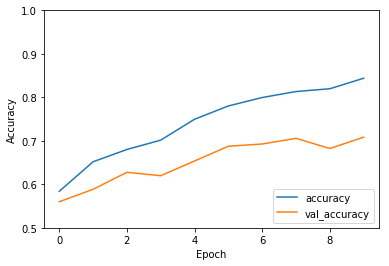

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

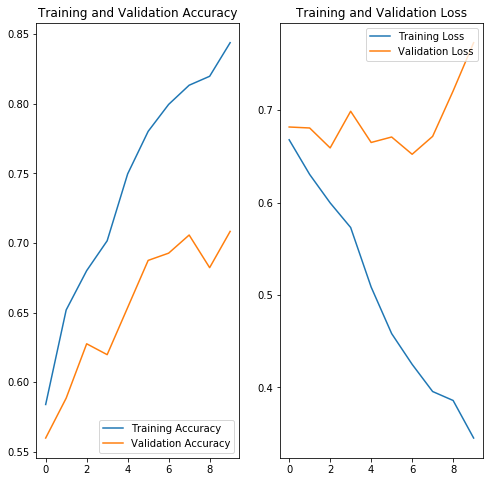

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

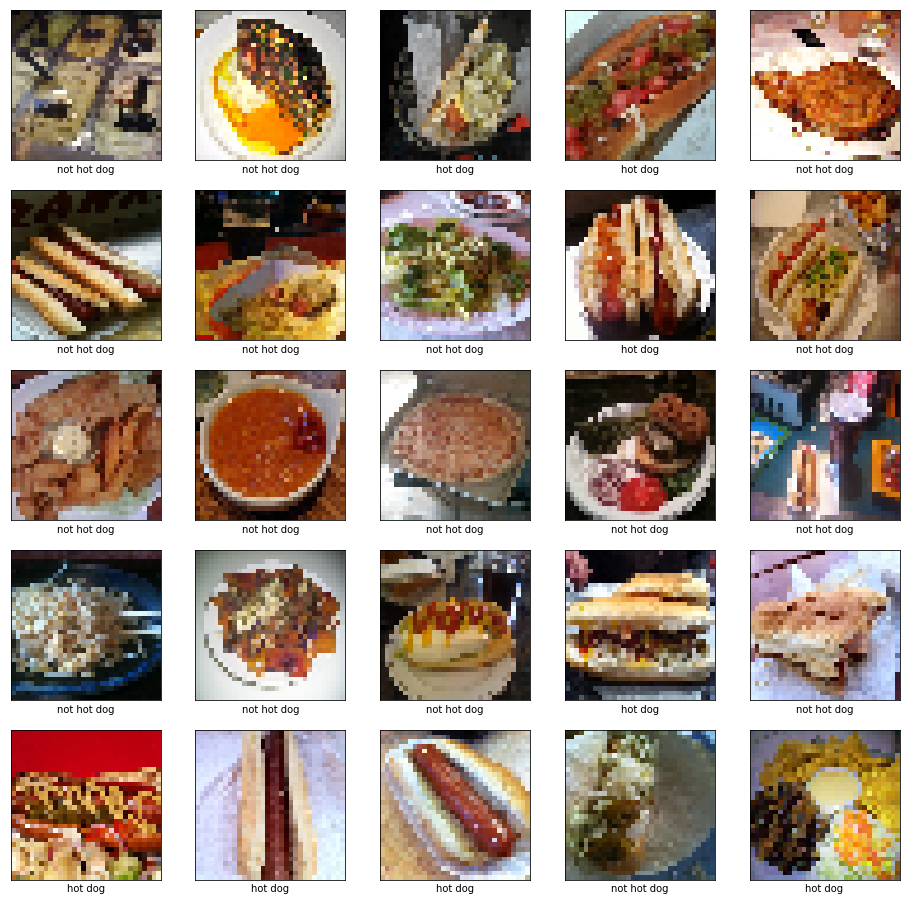

In [152]:
named_labels = ["hot dog", "not hot dog"]
plt.figure(figsize=(16,16))
x  = val_data_gen[0][0][25:150]
rez = model.predict(x)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i], cmap=plt.cm.binary)
    plt.xlabel(named_labels[np.argmax(rez[i])])
plt.show()

In [84]:
print(len(x))
print(len(train_data_gen[0][0][25:125]))
print(len(rez))

100
100
100
